In [37]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Nearest Neighbors

KNN is one of the simplest and most used classification algorithms. It is a **non-parametric** and lazy learning algorithm. Non-parametric meaning that it doesn't make any assumptions about the underlying data distribution. The algorithm is also "lazy" meaning that it needs most if not all of the training data during the testing phase, making the algorithm computationally expensive. It also requires high memory especially if k grows, which causes the prediction stage to become increasingly more slow. The KNN algorithm is based on feature similarity: how closely the unseen features resemble the training set determines how the given data point will be classified.

## Example #1 - Iris Dataset

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

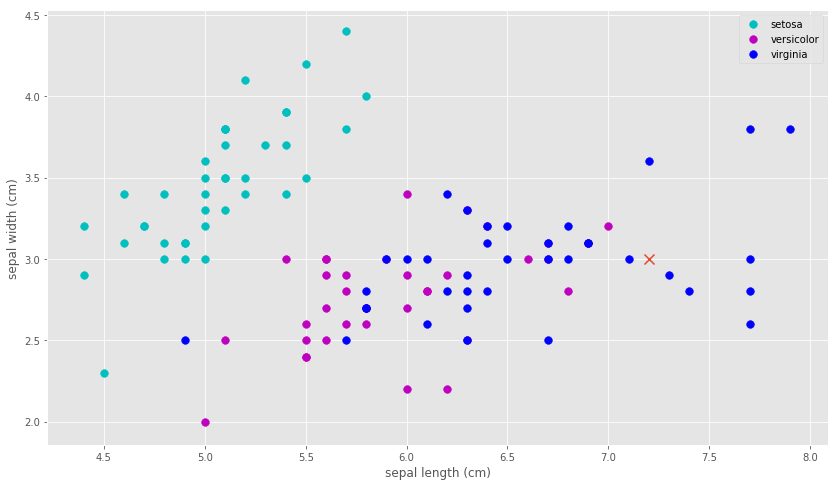

In [107]:
iris = sklearn.datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

df_data = pd.DataFrame(X_train, columns = iris.feature_names).iloc[:,0:2]
df_target = pd.DataFrame(y_train, columns = ['Species'])

conditions = [
    df_target['Species'] == 0
    , df_target['Species'] == 1
    , df_target['Species'] == 2
]

choices = list(iris.target_names)
df_target['Species Names'] = np.select(conditions, choices)
df = pd.concat([df_data, df_target], axis = 1)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot training data
plt.scatter(df[df['Species'] == 0].iloc[:,0], df[df['Species'] == 0].iloc[:,1], c = "c", label = "setosa", s = 60)
plt.scatter(df[df['Species'] == 1].iloc[:,0], df[df['Species'] == 1].iloc[:,1], c = "m", label = "versicolor", s = 60)
plt.scatter(df[df['Species'] == 2].iloc[:,0], df[df['Species'] == 2].iloc[:,1], c = "b", label = "virginia", s = 60)

# Plot first X, y pair of test data as a red "X"
plt.scatter(X_test[0][0], X_test[0][1], marker = 'x', s = 100)

# Label axes
plt.xlabel(df_data.columns[0])
plt.ylabel(df_data.columns[1])
plt.legend()
iris.target_names

### Fit the Model

In [76]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred[0]

0

### Model Evaluation

In [77]:
knn.score(X_test, y_test)

0.9736842105263158

## Example #2 - Newsgroups Dataset

From "Linear Classifiers in Python" DataCamp course. Part 1: Applying logisitic regression and SVM. Video: scikit-learn refresher.

### Fit the Model

In [ ]:
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(y_pred)

### Model Evaluation

Below is not a good way of evaluating your model because you are evaluating your models accuracy on already seen data. 

In [8]:
knn.score(X, y) 

0.9999116139296447

To get a better sense of your model accuracy, you should evaluate the accuracy of your model by using unseen data, that is, data that your model didn't use to train itself. That's why we need to use train_test_split.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6585365853658537